In [2]:
from imports import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings("ignore")


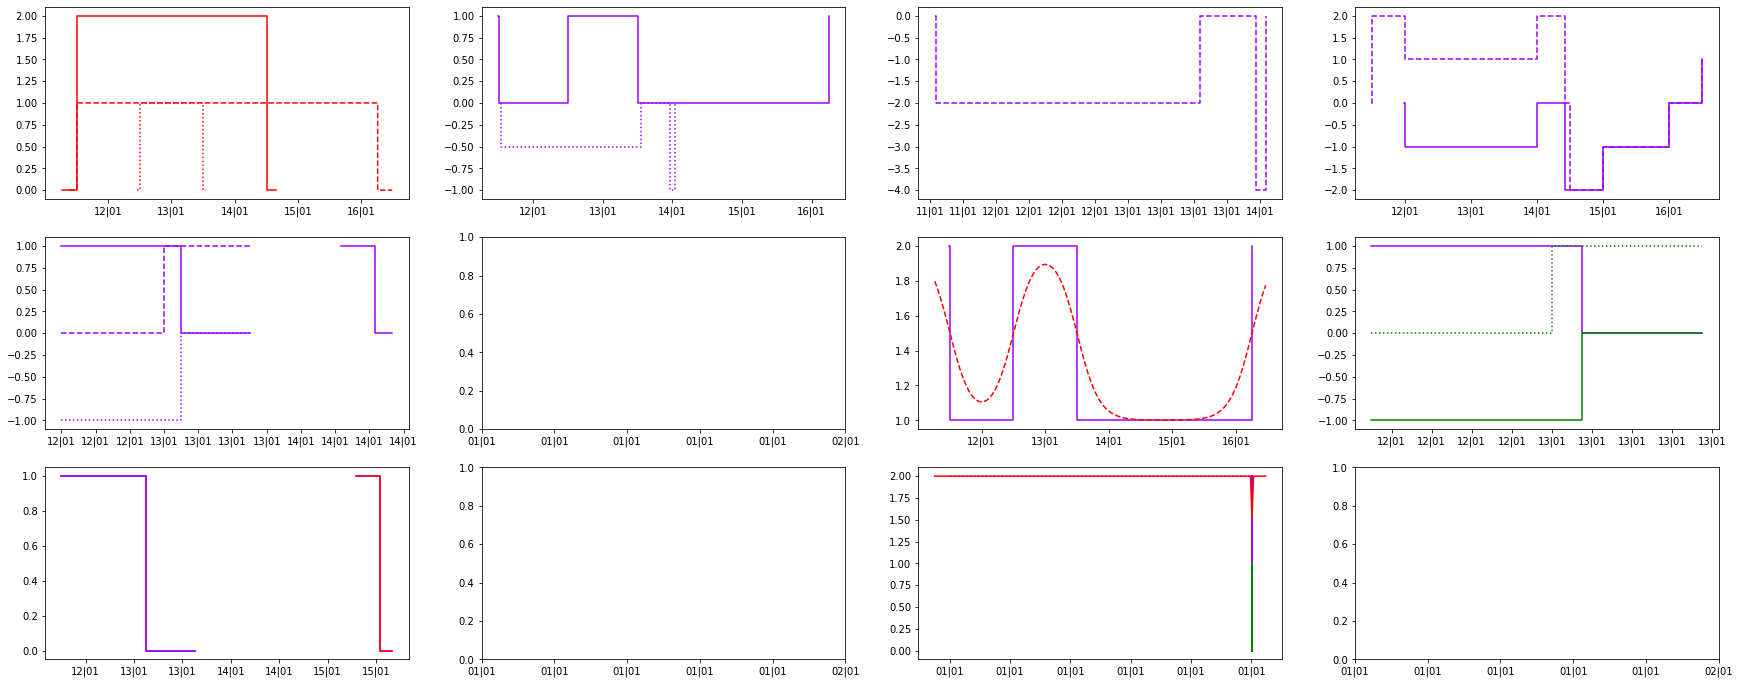

In [3]:
#t = np.arange(datetime(2020,1,9),datetime(2020,1,20),timedelta(hours=1)).astype(datetime)
fig, (axr1,axr2,axr3) = plt.subplots(ncols = 4, nrows=3, figsize=(30,12))

s1d = Step(start=datetime(2020,1,14,10,15),end=datetime(2020,1,16,12,1),weight=-2,use_datetime=True)

s2d = Step(start=datetime(2020,1,12),weight=-1)
s3d = Step(end=datetime(2020,1,13))
s4d = Step(start=datetime(2020,1,14),end=datetime(2020,1,16,12,1))
s5d = Step(start=datetime(2020,1,15))
s6d = Step(start=datetime(2020,1,16))

s7d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)
s8d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)
s9d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,14,12,0),weight=2)

s8d = Step(start=datetime(2020,1,12,12,0),end=datetime(2020,1,13,12,0))
s9d = Step(start=datetime(2020,1,11,12,0),end=datetime(2020,1,16,6))

std = Steps(use_datetime=True).add([s1d,s2d,s4d,s5d,s6d])
std2 = Steps(use_datetime=True).add([s8d])



s7d.plot(ax=axr1[0],color='r')
s8d.plot(ax=axr1[0],color='r',linestyle=':')
s9d.plot(ax=axr1[0],color='r',linestyle='--')

((std/s7d)).plot(ax=axr1[1],linestyle=':')
(std2-s9d+Step(use_datetime=True)).plot(ax=axr1[1])

((std*s7d)).plot(ax=axr1[2],linestyle='--')

(std+s7d).plot(ax=axr1[3],linestyle='--')
std.plot(ax=axr1[3])

(std2-s9d+2).plot(ax=axr2[2])
(std2-s9d+2).smooth_plot(ax=axr2[2],smooth_factor=30000,color='r',linestyle='--')

s3d.plot(ax=axr2[0])
(s3d>>pd.Timedelta(days=1.5)).plot(ax=axr2[0])
(s3d.reflect()).plot(ax=axr2[0],linestyle=':')
(s3d.reflect(axis=1)).plot(ax=axr2[0],linestyle='--')

s3d.plot(ax=axr2[3])
(s3d.reflect()).plot(ax=axr2[3],color='g')
(s3d.reflect(axis=1)).plot(ax=axr2[3],color='g',linestyle=':')

smulti = std2-s9d+2

smulti.plot(ax=axr3[2])
(smulti>>pd.Timedelta(days=1.5)).plot(ax=axr3[2],linestyle=':')
(smulti>>pd.Timedelta(days=1.5)).smooth_plot(ax=axr3[2],smooth_factor=10000,color='r')
(smulti<2).plot(ax=axr3[2],color='g')

s3d.plot(ax=axr3[0])
(s3d>>pd.Timedelta(days=2.5)).plot(ax=axr3[0])
s3d.plot(ax=axr3[0])
(s3d>>pd.Timedelta(days=2.5)).plot(ax=axr3[0],color='r')


date_form = DateFormatter('%d|%m')
axr1[0].xaxis.set_major_formatter(date_form)
axr1[1].xaxis.set_major_formatter(date_form)
axr1[2].xaxis.set_major_formatter(date_form)
axr1[3].xaxis.set_major_formatter(date_form)

axr2[0].xaxis.set_major_formatter(date_form)
axr2[1].xaxis.set_major_formatter(date_form)
axr2[2].xaxis.set_major_formatter(date_form)
axr2[3].xaxis.set_major_formatter(date_form)

axr3[0].xaxis.set_major_formatter(date_form)
axr3[1].xaxis.set_major_formatter(date_form)
axr3[2].xaxis.set_major_formatter(date_form)
axr3[3].xaxis.set_major_formatter(date_form)



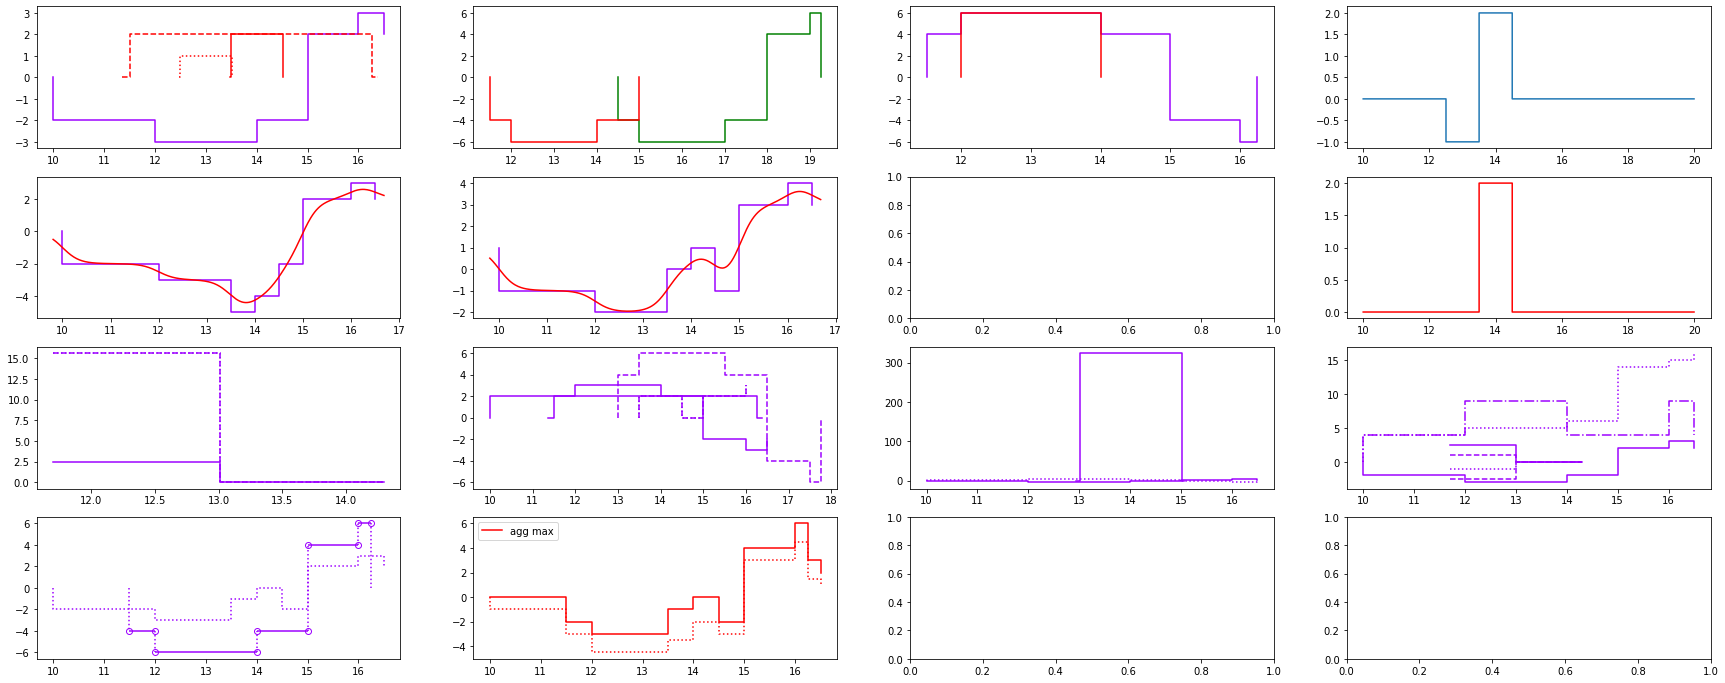

In [4]:
t = np.arange(10,20,0.01)
fig, (axr1,axr2,axr3,axr4) = plt.subplots(ncols = 4, nrows=4, figsize=(30,12))

s1 = Step(start=10,end=15,weight=-2)
s2 = Step(start=12,weight=-1)
s3 = Step(end=13,weight=2.5)
s4 = Step(start=14,end=16.5)
s5 = Step(start=15,weight=2)
s6 = Step(start=16)

s7 = Step(start=13.5,end=14.5,weight=2)
s8 = Step(start=12.5,end=13.5)
s9 = Step(start=11.5,end=16.25,weight=2)

st = Steps().add([s1,s2,s4,s5,s6])
st2 = Steps().add([s7])


st.plot(ax=axr1[0])
s7.plot(ax=axr1[0],color='r')
s8.plot(ax=axr1[0],color='r',linestyle=':')
s9.plot(ax=axr1[0],color='r',linestyle='--')
((st*s9)>>3).plot(ax=axr1[1],color='g')
(((st*s9)<-2)).plot(ax=axr1[1],color='r')

sst9 = (st*s9).reflect()
sst9.plot(ax=axr1[2])
(sst9>4).plot(ax=axr1[2],color='r')
#axr2[2].step(t,(((st*s9)>-0.5))(t),color='r',linestyle=':')

axr1[3].step(t,(st2-s8)(t))
axr2[3].step(t,((st2-s8)>-0.5)(t),color='r')

(st-st2).plot(ax=axr2[0])
(st-st2).smooth_plot(ax=axr2[0],smooth_factor=0.35,color='r')

(st+st2+1).plot(ax=axr2[1])
(st+st2+Step()).smooth_plot(ax=axr2[1],smooth_factor=0.35,color='r')


(st-s8).plot(ax=axr3[2])
(st-s8).reflect().plot(ax=axr3[2],linestyle=':')

s3.plot(ax=axr3[3])
s3.normalise().plot(ax=axr3[3],linestyle='--')

s3.reflect().plot(ax=axr3[3],linestyle='--')
s3.reflect().normalise().plot(ax=axr3[3],linestyle=':')


s3.plot(ax=axr3[0])
(s3**3).plot(ax=axr3[0],linestyle='--')
(s3*s3*s3).plot(ax=axr3[0],linestyle=':')

st.reflect().plot(ax=axr3[1])
s9.plot(ax=axr3[1])
((st.reflect()*s9)>>1.5).plot(ax=axr3[1],linestyle='--')

(st2+s5+s6).plot(ax=axr3[1],linestyle='--')
(st2+s5+s6).plot(ax=axr3[1],linestyle=':')


((s1*3*((s1*1.5)>>3))**2).plot(ax=axr3[2])
st.plot(ax=axr3[3])
((st**2)).plot(ax=axr3[3],linestyle=':')
((st*st)).plot(ax=axr3[3],linestyle='-.')

comp1 = st+st2
comp2 = st*s9

agg_st = Steps.aggregate([comp1,comp2],np.max)
agg_st2 = Steps.aggregate([comp1,comp2],np.mean)

comp1.plot(ax=axr4[0],linestyle=':')
comp2.plot(ax=axr4[0],method='pretty')
agg_st.plot(ax=axr4[1],color='r',label='agg max')
agg_st2.plot(ax=axr4[1],color='r',linestyle=':')

axr4[1].legend()


<AxesSubplot:>

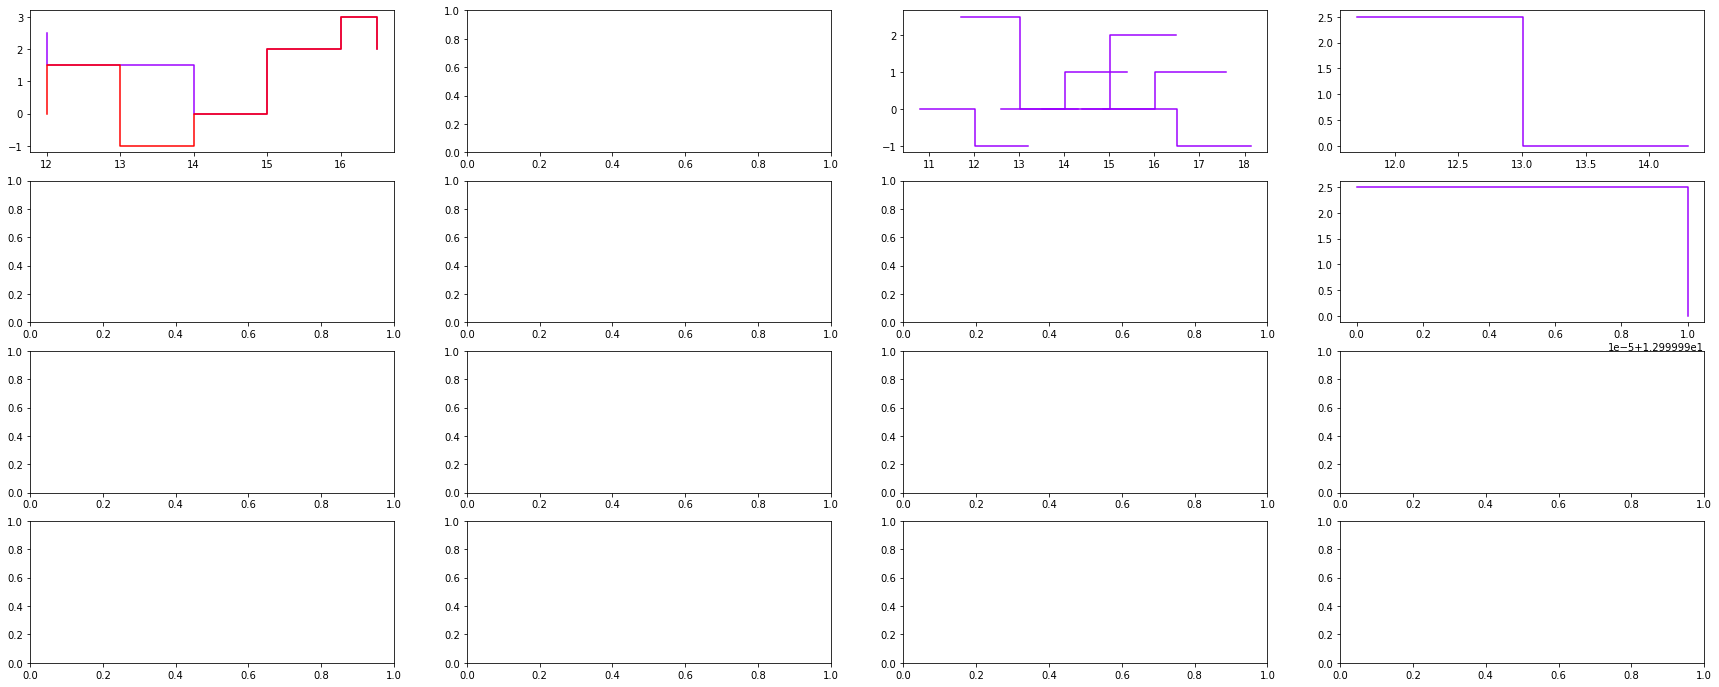

In [5]:
t = np.arange(10,20,0.01)
fig, (axr1,axr2,axr3,axr4) = plt.subplots(ncols = 4, nrows=4, figsize=(30,12))

s3a = Step(weight=2.5) + Step(start=13,weight=-2.5)

st3 = Steps().add([s2,s3,s4,s5,s6])
st3.plot(ax=axr1[0])
(st3>0).plot(ax=axr1[0],color='r')

for s in st3:
    s.plot(ax=axr1[2])

s3.plot(ax=axr1[3])
s3a.plot(ax=axr2[3])
# s1 = Step(start=10,end=15,weight=-2)
# s2 = Step(start=12,weight=-1)
# s3 = Step(end=13,weight=2.5)
# s4 = Step(start=14,end=16.5)
# s5 = Step(start=15,weight=2)
# s6 = Step(start=16)

# s7 = Step(start=13.5,end=14.5,weight=2)
# s8 = Step(start=12.5,end=13.5)
# s9 = Step(start=11.5,end=16.25,weight=2)

In [9]:
from itertools import groupby
#from operator import itemgetter

all_keys = np.array([s.start() for s in st3._steps])
#all_keys = np.sort(np.append(all_keys,[10]))
all_values = st3(all_keys)

k = np.where(all_values > 0,True,False)

groups = [(group[0],group[-1]) for group in (list(group) for key, group in groupby(range(len(k)), key=k.__getitem__) if key)]
groups

[(0, 1), (3, 5)]

In [11]:
all_values

array([1.5, 1.5, 0. , 2. , 3. , 2. ])

In [7]:
filtered = np.array([])

for s,e in groups:
    filtered = np.append(filtered,st3._steps[s:e])
    print(all_values[s],all_values[e])
    print(st3._steps[s:e])

st3_filtered = Steps().add(filtered)

1.5 1.5
[12:-1]
2.0 2.0
[15:2 16:1]


<AxesSubplot:>

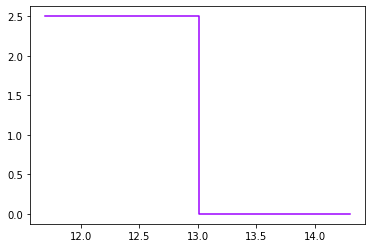

In [8]:
s3plot = Step(end=13,weight=2.5,use_datetime=False)
s3plot.plot()